In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Question 2 Create a single visualization that compares APRs of men’s and women’s sports. Comment on the major finding(s).

**Answer:** As the graph shows below, women's median APR are generally higher than men's.

In [ ]:
url = "https://ncaaorg.s3.amazonaws.com/research/academics/2020RES_APR2019PubDataShare.csv"
df = pd.read_csv(url)
df.head()

,DATA_TAB_GENERALINFO,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,ACADEMIC_YEAR,SCL_DIV_19,SCL_SUB_19,D1_FB_CONF_19,CONFNAME_19,...,PUB_AWARD_15,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06
0,NaN,100654,Alabama A&M University,1,Baseball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100654,Alabama A&M University,2,Men's Basketball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,100654,Alabama A&M University,4,Football,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,100654,Alabama A&M University,6,Men's Golf,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,100654,Alabama A&M University,13,Men's Tennis,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#extract men and women, set the info into a new column named "gender"
mask = df['SPORT_NAME'].str.contains('men', case=False)
df_gender = df[mask]
df_gender = df_gender.assign(gender=df_gender['SPORT_NAME'].str.split().str.get(0))
df_gender

,DATA_TAB_GENERALINFO,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,ACADEMIC_YEAR,SCL_DIV_19,SCL_SUB_19,D1_FB_CONF_19,CONFNAME_19,...,PUB_AWARD_14,PUB_AWARD_13,PUB_AWARD_12,PUB_AWARD_11,PUB_AWARD_10,PUB_AWARD_09,PUB_AWARD_08,PUB_AWARD_07,PUB_AWARD_06,gender
1,NaN,100654,Alabama A&M University,2,Men's Basketball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men's
3,NaN,100654,Alabama A&M University,6,Men's Golf,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men's
4,NaN,100654,Alabama A&M University,13,Men's Tennis,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,Men's
5,NaN,100654,Alabama A&M University,14,"Men's Track, Cross Country",2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men's
6,NaN,100654,Alabama A&M University,18,Women's Basketball,2019,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,Women's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,NaN,486840,Kennesaw State University,28,Women's Softball,2019,1,2,Big South Conference,ASUN Conference,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's
6013,NaN,486840,Kennesaw State University,30,Women's Soccer,2019,1,2,Big South Conference,ASUN Conference,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's
6014,NaN,486840,Kennesaw State University,33,Women's Tennis,2019,1,2,Big South Conference,ASUN Conference,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's
6015,NaN,486840,Kennesaw State University,34,"Women's Track, Cross Country",2019,1,2,Big South Conference,ASUN Conference,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Women's


In [ ]:
#Turn this into long form data, gender column as id, APR as value
df_g = pd.melt(df_gender, id_vars="gender",value_vars=["APR_RATE_2019_1000","APR_RATE_2018_1000","APR_RATE_2017_1000","APR_RATE_2016_1000",
                                                       "APR_RATE_2015_1000","APR_RATE_2014_1000","APR_RATE_2013_1000","APR_RATE_2012_1000",
                                                       "APR_RATE_2011_1000","APR_RATE_2010_1000","APR_RATE_2009_1000","APR_RATE_2008_1000",
                                                       "APR_RATE_2007_1000","APR_RATE_2006_1000","APR_RATE_2005_1000","APR_RATE_2004_1000"],
               value_name="APR_value",
               var_name="year")
#long-form data in Seaborn does not necessarily have to have only two columns. The main requirement for long-form data is that it is arranged in a "tidy" format, where each row represents a single observation and each column represents a variable. 
#In this format, one column typically represents the independent variable (also known as the x-axis) and another column represents the dependent variable (also known as the y-axis). 
#However, there can also be additional columns representing other variables such as grouping variables that can be used to aggregate and group the data.
df_g


,gender,year,APR_value
0,Men's,APR_RATE_2019_1000,867.0
1,Men's,APR_RATE_2019_1000,962.0
2,Men's,APR_RATE_2019_1000,1000.0
3,Men's,APR_RATE_2019_1000,833.0
4,Women's,APR_RATE_2019_1000,982.0
...,...,...,...
87083,Women's,APR_RATE_2004_1000,NaN
87084,Women's,APR_RATE_2004_1000,NaN
87085,Women's,APR_RATE_2004_1000,NaN
87086,Women's,APR_RATE_2004_1000,NaN


[Text(0.5, 1.0, "compare men's and women's APR from 2004-2019")]

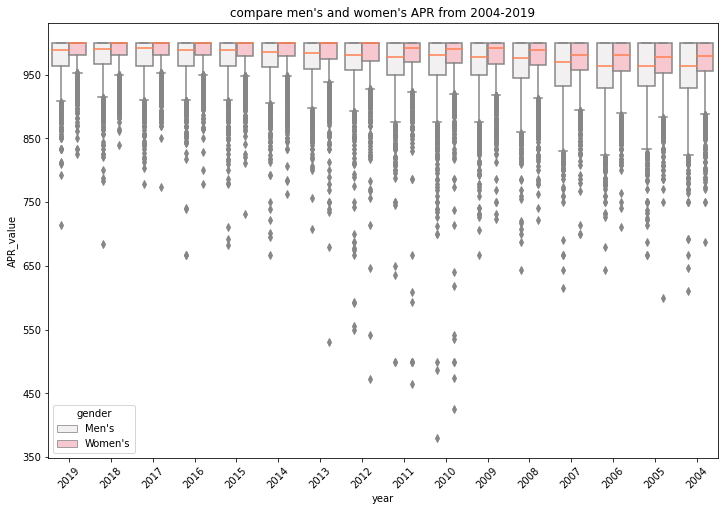

In [ ]:
# Set the plot size
plt.figure(figsize=(12, 8))
apr = sns.boxplot(data=df_g, x="year", y="APR_value",hue= "gender",color='pink',medianprops={"color": "coral"}).set(title="compare men's and women's APR from 2004-2019")
# increase the interval of x and y axis
plt.gca().set_yticks(range(350, 1000, 100))
plt.gca().set_xticks(range(0, 16))
plt.gca().set_xticklabels(["2019","2018","2017","2016","2015","2014","2013","2012","2011","2010","2009","2008","2007","2006","2005","2004",],rotation=45)
apr